Text Mining and Image Processing
Hoja de trabajo No1  
Luis Adolfo Martínez
Carne:
**22000352** 

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import os.path
from os import path

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
direccion = "/content/drive/MyDrive/TextMining/Archivos"
os.chdir(direccion)

In [5]:
def cargaImagen(img):
  salida = cv2.imread(img)
  salida = cv2.cvtColor(salida, cv2.COLOR_BGR2RGB)
  plt.imshow(salida)
  return salida

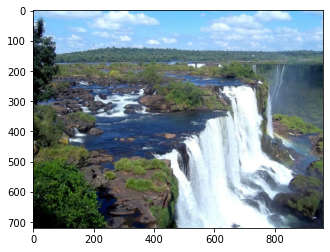

In [6]:
img = cargaImagen("paisaje.jpg")

## Problema 1

In [7]:
def ImagenCambioColor(p_img,p_color):
  
  altura = p_img.shape[0]
  ancho  = p_img.shape[1]
  img_out = np.zeros((altura,ancho,3)) # de tres banda

  for i in range(0,altura):
    for j in range(0, ancho):
      blue = img[i,j][2]
      green = img[i,j][1]
      red   = img[i,j][0]

      if p_color == 1: img_out[i,j] = [blue,0,0]
      if p_color == 2: img_out[i,j] = [0,green,0]
      if p_color == 3: img_out[i,j] = [0,0,red]
      if p_color == 10: img_out[i,j] = [0,green,red]
      if p_color == 20: img_out[i,j] = [blue,green,0]
      if p_color == 20: img_out[i,j] = [blue,0,red]
  salida = "imagenResultadoColor_"+str(p_color)+".jpg"
  # guardamos imagen
  cv2.imwrite(salida, img_out)
  img_temp = cv2.imread(salida)
  img_temp = cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB)
  plt.imshow(img_temp)


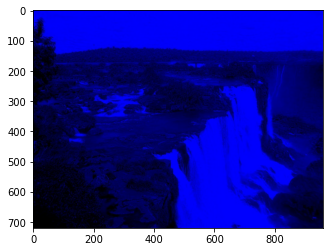

In [8]:
ImagenCambioColor(img,1)

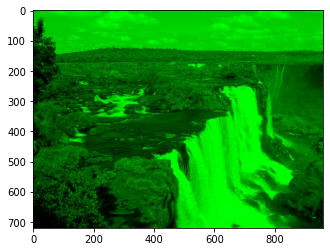

In [9]:
ImagenCambioColor(img,2)

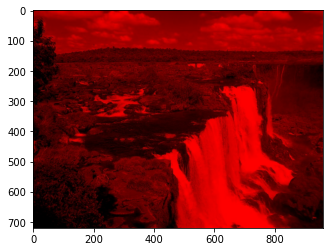

In [10]:
ImagenCambioColor(img,3)

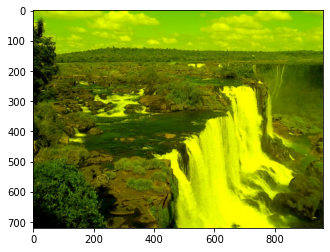

In [11]:
ImagenCambioColor(img,10)

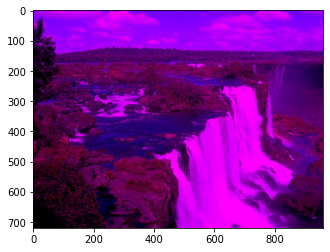

In [12]:
ImagenCambioColor(img,20)

**Problema 2**

In [13]:
def conversion_3Dgray_to_color(blue,green,red):
  altura = blue.shape[0]
  ancho  = blue.shape[1]

  imagen_color = np.zeros((altura,ancho,3))

  for i in range(0,altura):
    for j in range(0,ancho):
      bluecolor   = blue[i,j][2]
      greencolor  = green[i,j][1]
      redcolor    = red[i,j][0]

      imagen_color[i,j] = [bluecolor,greencolor,redcolor]

  fecha = datetime.now()
  salida = "imagenColor_"+fecha.strftime("%Y%m%d_%H%M%S")+".jpg"
  # guardamos imagen
  cv2.imwrite(salida, imagen_color)
  img_temp = cv2.imread(salida)
  img_temp = cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB)
  plt.imshow(img_temp)   


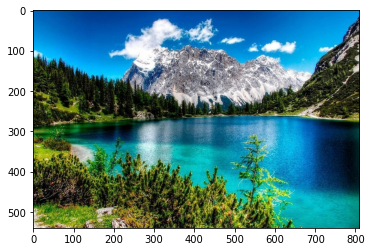

In [14]:
#Imagen 1
blue = cv2.imread("imagen1_salida_gray_azul.jpg")
green = cv2.imread("imagen1_salida_gray_verde.jpg")
red = cv2.imread("imagen1_salida_gray_rojo.jpg")

conversion_3Dgray_to_color(blue, green,red)


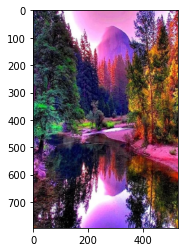

In [15]:
#Imagen 2
blue = cv2.imread("imagen2_salida_gray_azul.jpg")
green = cv2.imread("imagen2_salida_gray_verde.jpg")
red = cv2.imread("imagen2_salida_gray_rojo.jpg")

conversion_3Dgray_to_color(blue, green,red)


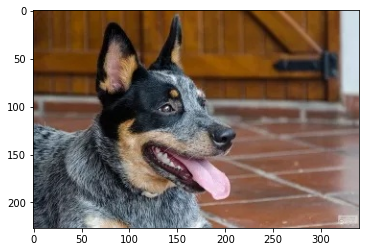

In [16]:
#Imagen 3
blue = cv2.imread("perro_salida_gray_azul.jpg")
green = cv2.imread("perro_salida_gray_verde.jpg")
red = cv2.imread("perro_salida_gray_rojo.jpg")

conversion_3Dgray_to_color(blue, green,red)


## Problema 3

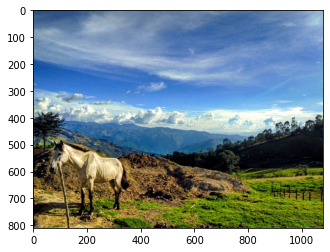

In [17]:
img = cv2.imread("paisaje2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [18]:
def imgen_to_gray3D(imagen):
  alto = imagen.shape[0]
  ancho = imagen.shape[1]

  green = np.zeros((alto, ancho, 1))
  blue = np.zeros((alto, ancho, 1))
  red = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
    for j in range(0, ancho):
      blue[i,j] = imagen[i,j][2]
      green[i,j] = imagen[i,j][1]
      red[i,j] = imagen[i,j][0] 

  # Salvamos las imagenes
  now = datetime.now()
  cv2.imwrite("imgagen_gray_blue_"+now.strftime("%Y%m%d_%H%M%S")+".jpg", blue)
  cv2.imwrite("imgagen_gray_green_"+now.strftime("%Y%m%d_%H%M%S")+".jpg",green)
  cv2.imwrite("imgagen_gray_red_"+now.strftime("%Y%m%d_%H%M%S")+".jpg", red)


  img_lista =[] 

  blue = cv2.imread("imgagen_gray_blue_"+now.strftime("%Y%m%d_%H%M%S")+".jpg")
  green = cv2.imread("imgagen_gray_green_"+now.strftime("%Y%m%d_%H%M%S")+".jpg")
  red = cv2.imread("imgagen_gray_green_"+now.strftime("%Y%m%d_%H%M%S")+".jpg")
  
  img_lista.append(cv2.cvtColor(blue, cv2.COLOR_BGR2RGB))
  img_lista.append(cv2.cvtColor(green, cv2.COLOR_BGR2RGB))
  img_lista.append(cv2.cvtColor(red, cv2.COLOR_BGR2RGB))
  color = ["blue", "green", "red"]

  plt.figure(figsize=(25,25))
  for i in range(len(img_lista)):
    plt.subplot(1, len(img_lista), i + 1)
    plt.imshow(img_lista[i])
    plt.title("Gray {}".format(color[i]), fontdict={"fontsize":16, "color":color[i]})
  plt.show()



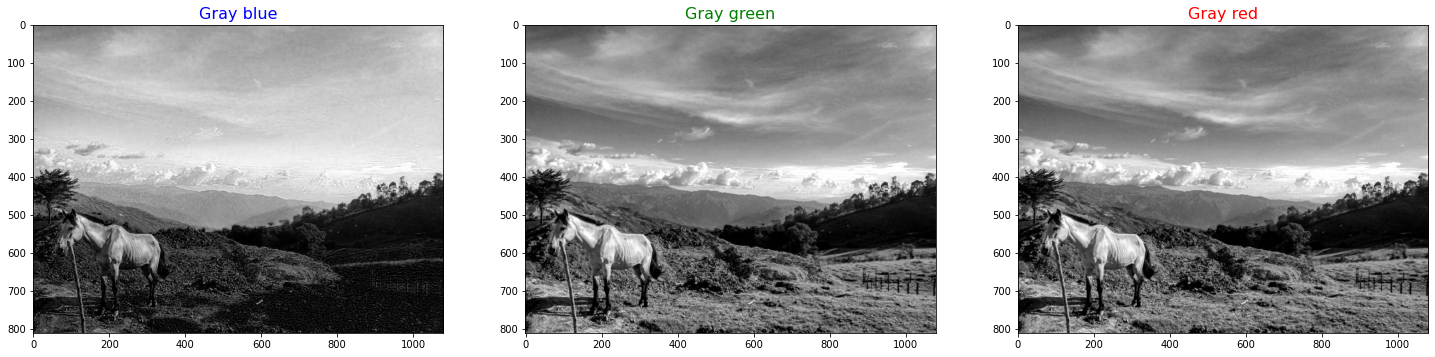

In [19]:
imgen_to_gray3D(img)

## Problema 4

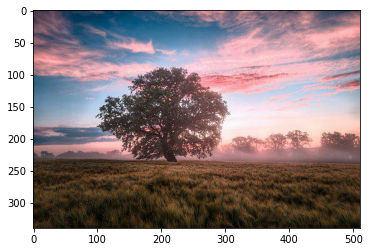

In [20]:
img = cv2.imread("paisaje3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [21]:
def histogram(imagen):

  #Image dimensions
  alto = imagen.shape[0]
  ancho = imagen.shape[1]

  # Promedio Gris
  green = np.zeros((alto, ancho, 1)) # una banda
  blue = np.zeros((alto, ancho, 1))
  red = np.zeros((alto, ancho, 1))
  mean = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
    for j in range(0, ancho):
      blue[i,j] = imagen[i,j][2]
      green[i,j] = imagen[i,j][1]
      red[i,j] = imagen[i,j][0]
      mean[i,j] = np.mean(imagen[i,j])
  
  img_lista =[] 
  img_lista.append(blue.ravel())
  img_lista.append(green.ravel())
  img_lista.append(red.ravel())
  img_lista.append(mean.ravel())
  
  color = ["blue", "green", "red","gray"]

  plt.figure(figsize=(22,22))
  for i in range(len(img_lista)):
    plt.subplot(2, 2, i+1)
    plt.hist(img_lista[i], 256, [0,256], color=color[i])
    plt.axvline(np.mean(img_lista[i]), color="black", linestyle="-")
    plt.title("Media aritmética : {}".format(np.round(np.mean(img_lista[i]), 4)), fontdict={"fontsize":14, "color":color[i]})
  plt.show()

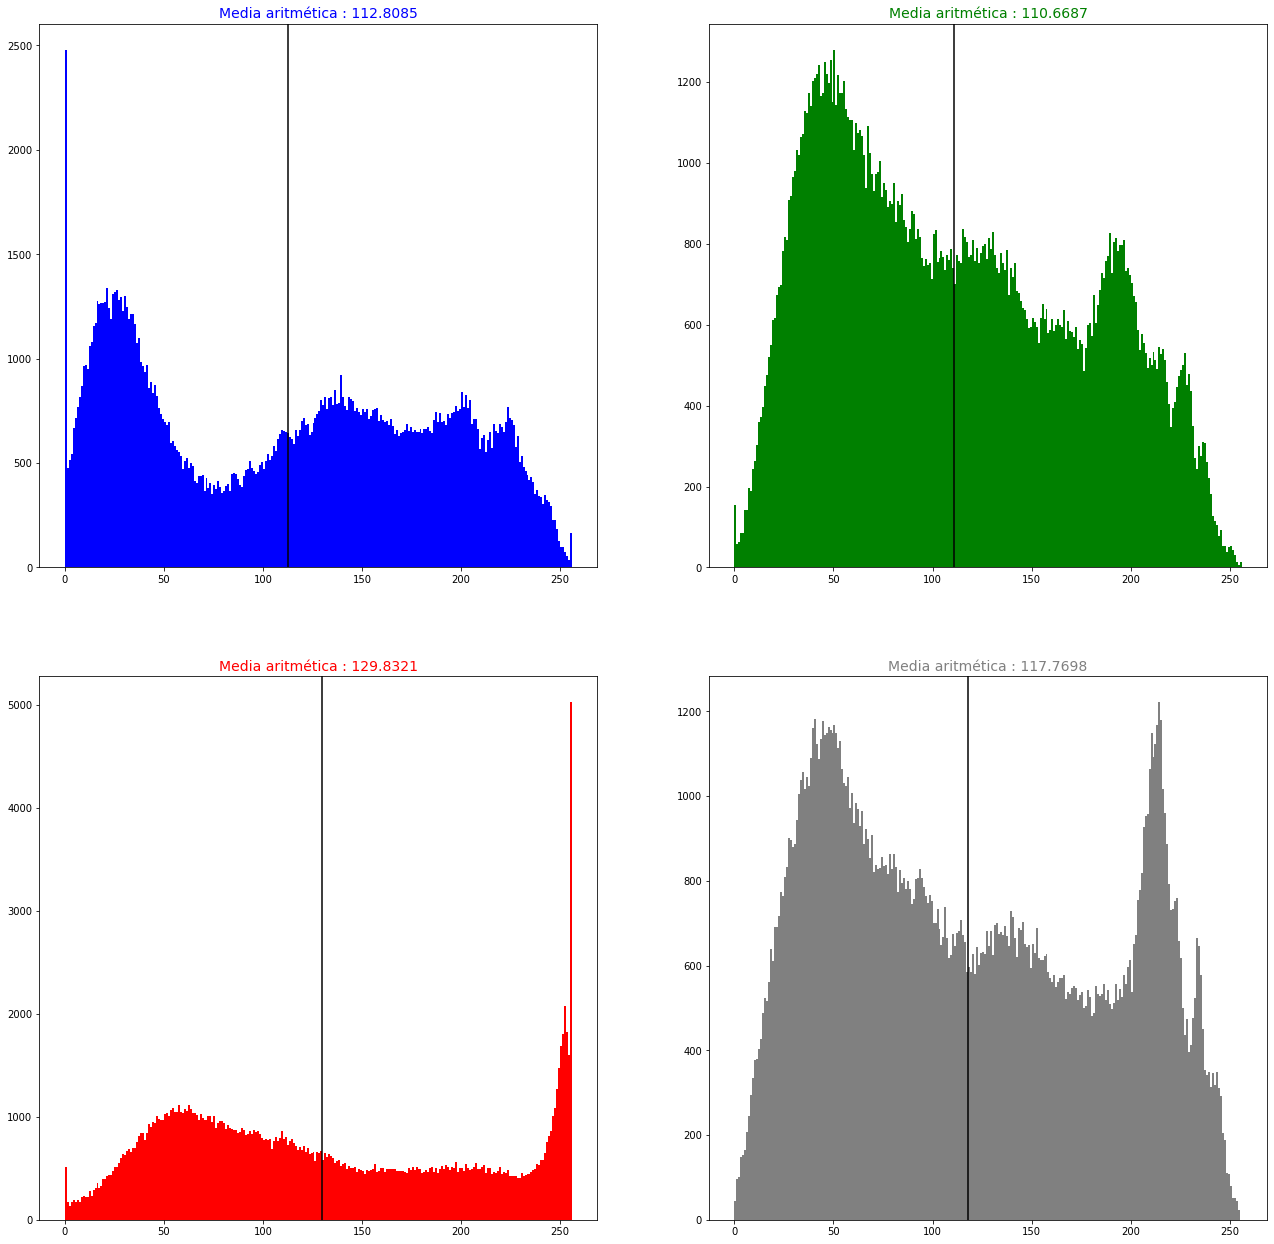

In [22]:
histogram(img)

## Problema 5

## Problema 6

 *Fuente: www.ecured.cu*


Es una representación 3D en donde el color sigue una representación más parecida a las coordendas cilíndricas, esta basdo en los siguientes componentes:


**Tinte o matiz**: Angúlo definido entre 0º y 360º, 


**Saturación**: Nivel de saturación del coloro representado entre 0 y 1, en donde el 0 representa que no hay saturación y 1 que sería una matiz en todo su intesidad


**Brillo o valor:**  Nivel de brillo entre 0 y 1, donde 0 es el negro y el 1 representa blanco.




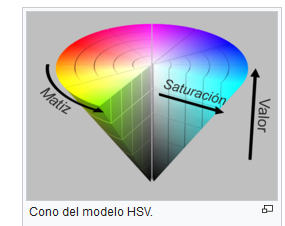

